In [1]:
import pandas as pd
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

**I manualy put in a lable as the first column**

In [2]:
z2_n7_df = pd.read_csv('../data/z2Ham_L7_p4_N2000.txt', delim_whitespace=True, header=None)
z2_n9_df = pd.read_csv('../data/z2Ham_L9_p4_N2000.txt', delim_whitespace=True, header=None)


In [3]:
rows_n7 = z2_n7_df.shape[0]
rows_n9 = z2_n9_df.shape[0]

In [4]:
print(rows_n7)
print(rows_n9)

2000
2000


In [5]:
z2_n7_df.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=2000)

# Look at Simple Metrics
-----------------------------------

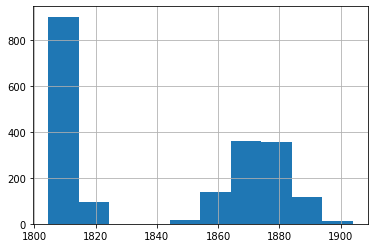

In [7]:
z2_n7_df.agg('sum').hist()

In [8]:
summed = z2_n7_df.agg('sum')

In [9]:
type(summed)

pandas.core.series.Series

(array([ 14.,  50., 104., 193., 229., 206., 124.,  64.,  11.,   5.]),
 array([1848.46938776, 1854.0122449 , 1859.55510204, 1865.09795918,
        1870.64081633, 1876.18367347, 1881.72653061, 1887.26938776,
        1892.8122449 , 1898.35510204, 1903.89795918]),
 <a list of 10 Patch objects>)

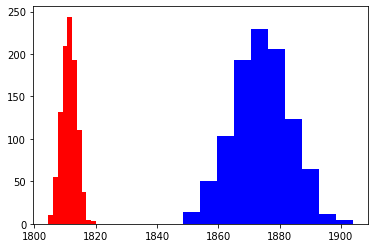

In [10]:
plt.hist(summed.values[:int(len(summed)/2)], color='r')
plt.hist(summed.values[int(len(summed)/2):], color='b')

# PCA
-------------------------

In [11]:
ipca = IncrementalPCA(n_components=2, batch_size=400)

In [12]:
scrambled_n7_df = z2_n7_df.sample(frac=1)

In [13]:
ipca.fit(scrambled_n7_df)

IncrementalPCA(batch_size=400, n_components=2)

In [14]:
ipca.fit_transform(scrambled_n7_df).shape

(2000, 2)

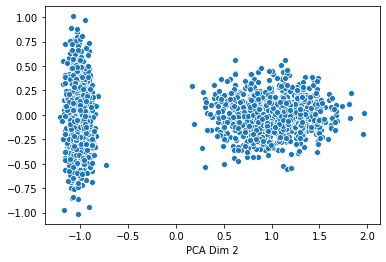

In [15]:
sns.scatterplot(ipca.fit_transform(z2_n7_df)[:,0], ipca.fit_transform(z2_n7_df)[:,1])
plt.xlabel("PCA Dim 1")
plt.xlabel("PCA Dim 2")
plt.savefig("pca_z2_n7.png")

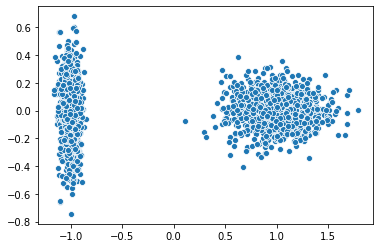

In [16]:
sns.scatterplot(ipca.fit_transform(z2_n9_df)[:,0], ipca.fit_transform(z2_n9_df)[:,1])

# Simple Clasifier, Logistic Regresion

# Simple Clasifier, Logistic Regresion

## On raw data

In [17]:
df = z2_n7_df.copy()

In [18]:
target = [0] * int(rows_n7/2)

In [19]:
target += [1] * int(rows_n7/2)

In [20]:
df['target'] = target

In [21]:
lr = LogisticRegression(max_iter=400)
train, test = train_test_split(df.sample(frac=1.0), test_size=0.2)

In [22]:
train_x = train.drop('target', axis=1)
train_y = train['target']

test_x = test.drop('target', axis=1)
test_y = test['target']

In [23]:
len(train_x.columns)

2000

In [25]:
'target' in train_x.columns

False

In [26]:
lr.fit(train_x, train_y)

LogisticRegression(max_iter=400)

In [27]:
lr.score(test_x, test_y)

1.0